In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r'/Users/srinivasanc/Downloads/titanic dataset.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
884    False
885    False
886    False
887    False
888    False
Length: 889, dtype: bool

In [16]:
data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [18]:
data['FamilySize'] = data['SibSp'] + data['Parch']

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
label_encoder = LabelEncoder()

In [32]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [38]:
scaler = StandardScaler()
data[['Age','Fare']] = scaler.fit_transform(data[['Age','Fare']])

In [40]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,0,-0.824375,1,0,-0.500240,2,1
1,2,1,1,1,0.218307,1,0,0.788947,0,1
2,3,1,3,1,-0.552371,0,0,-0.486650,2,0
3,4,1,1,1,0.036971,1,0,0.422861,2,1
4,5,0,3,0,0.036971,0,0,-0.484133,2,0


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [44]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [46]:
X_train, X_test , y_train,y_test = train_test_split(X, y ,test_size = 0.2 , random_state = 42)

In [48]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test,y_pred)

In [54]:
report = classification_report(y_test, y_pred)

In [60]:
print(f'Accuracy :', accuracy)
print(f'Classification_report :\n', report)

Accuracy : 0.7921348314606742
Classification_report :
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [68]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation = 'relu'),
    Dropout(0.3),
    Dense(64,activation = 'relu'),
    Dropout(0.3),
    Dense(1 , activation = 'sigmoid')
])

/Library/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 70, batch_size = 32 , verbose = 1)

Epoch 1/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5881 - loss: 0.6770 - val_accuracy: 0.6798 - val_loss: 0.6030
Epoch 2/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6390 - loss: 0.6272 - val_accuracy: 0.7360 - val_loss: 0.5537
Epoch 3/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7332 - loss: 0.5600 - val_accuracy: 0.8146 - val_loss: 0.5122
Epoch 4/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.5286 - val_accuracy: 0.7865 - val_loss: 0.4900
Epoch 5/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7400 - loss: 0.5073 - val_accuracy: 0.7865 - val_loss: 0.4704
Epoch 6/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7954 - loss: 0.4852 - val_accuracy: 0.8034 - val_loss: 0.4639
Epoch 7/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8137 - loss: 0.4579 - val_accuracy: 0.8090 - val_loss: 0.4617
Epoch 8/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8148 - loss: 0.4126 - val_accuracy: 0.8034 - val_loss:

In [76]:
loss, accuracy = model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4498


In [78]:
print("Neural Network Accuracy:", accuracy)

Neural Network Accuracy: 0.8089887499809265


In [80]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.76      0.74      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



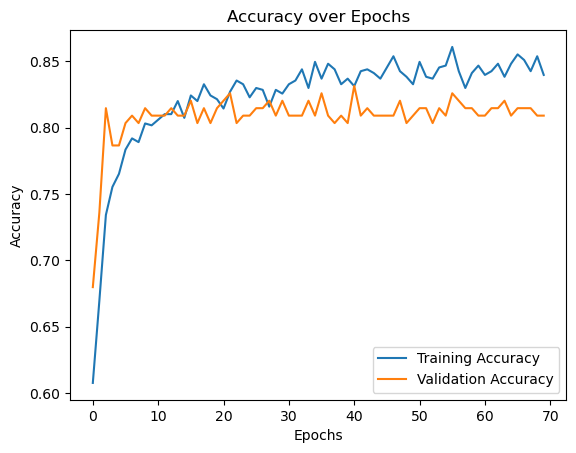

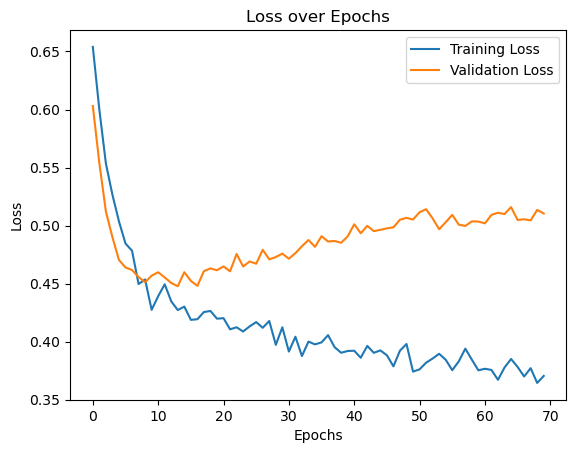

In [82]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()